In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hotels Against Trafficking
Sep 11, 2019<br>
Ngoc Tran

---------------------------------------

## Import

In [0]:
import os
import pickle
import warnings

from keras.models import load_model
from keras.utils import to_categorical

warnings.filterwarnings("ignore")

Using TensorFlow backend.


Get the original directory:

In [0]:
original_path = os.getcwd()

Change directory to get the source code to evaluate the best model:

In [0]:
%cd drive/My\ Drive/hotel-recognition/src

/content/drive/My Drive/hotel-recognition/src


More import:

In [0]:
import evaluate_model

Change back to the original directory:

In [0]:
os.chdir(original_path)

## Load and process the test images

Change directory to load the test images:

In [0]:
%cd drive/My\ Drive/hotel-recognition/data/processed

/content/drive/My Drive/hotel-recognition/data/processed


Load and process the test images and labels:

In [0]:
# images
test_images_unoccluded = pickle.load(open("test_images_unoccluded.pickle", "rb"))
test_images_unoccluded = test_images_unoccluded * 1.0 / 255
test_images_low_occlusions = pickle.load(open("test_images_low_occlusions.pickle", "rb"))
test_images_low_occlusions = test_images_low_occlusions * 1.0 / 255
test_images_medium_occlusions = pickle.load(open("test_images_medium_occlusions.pickle", "rb"))
test_images_medium_occlusions = test_images_medium_occlusions * 1.0 / 255
test_images_high_occlusions = pickle.load(open("test_images_high_occlusions.pickle", "rb"))
test_images_high_occlusions = test_images_high_occlusions * 1.0 / 255

# labels
test_labels = pickle.load(open("test_labels.pickle", "rb"))
test_labels_enc = to_categorical(test_labels, 3)

Change back to the original directory:

In [0]:
os.chdir(original_path)

## Load the best model

Change directory to load the best model:

In [0]:
%cd drive/My\ Drive/hotel-recognition/model

/content/drive/My Drive/hotel-recognition/models


Load the best model:

In [0]:
model = load_model("best_model.hdf5")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Change back to the original directory:

In [0]:
os.chdir(original_path)

## Evaluate the best model

### Unoccluded

In [0]:
score = model.evaluate(test_images_unoccluded, test_labels_enc)
print("\nTest loss:      ", score[0])
print("Test accuracy:  ", score[1])

1021/1021 [==============================] - 7s 7ms/step

Test loss:       3.220367976664096
Test accuracy:   0.49363369164107246


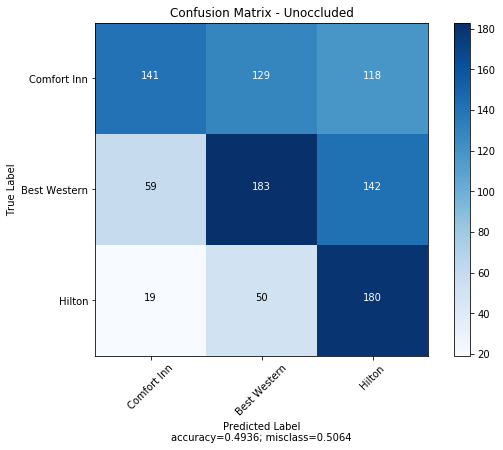

              precision    recall  f1-score   support

 Comfort Inn       0.64      0.36      0.46       388
Best Western       0.51      0.48      0.49       384
      Hilton       0.41      0.72      0.52       249

    accuracy                           0.49      1021
   macro avg       0.52      0.52      0.49      1021
weighted avg       0.53      0.49      0.49      1021



In [0]:
real_labels = list(test_labels)
predicted_labels = list(model.predict_classes(test_images_unoccluded))
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = False,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Unoccluded")

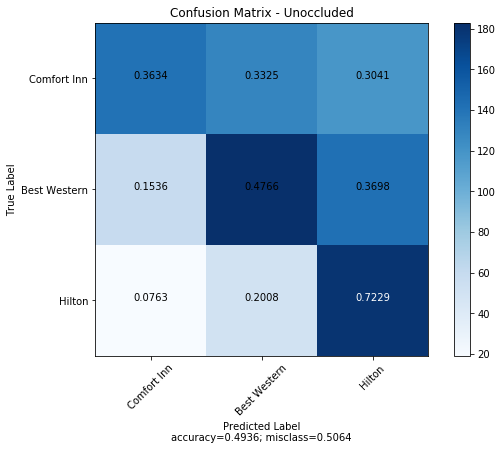

              precision    recall  f1-score   support

 Comfort Inn       0.64      0.36      0.46       388
Best Western       0.51      0.48      0.49       384
      Hilton       0.41      0.72      0.52       249

    accuracy                           0.49      1021
   macro avg       0.52      0.52      0.49      1021
weighted avg       0.53      0.49      0.49      1021



In [0]:
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = True,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Unoccluded")

### Low Occlusions

In [0]:
score = model.evaluate(test_images_low_occlusions, test_labels_enc)
print("\nTest loss:      ", score[0])
print("Test accuracy:  ", score[1])

1021/1021 [==============================] - 3s 3ms/step

Test loss:       3.3790373740303643
Test accuracy:   0.4955925560254425


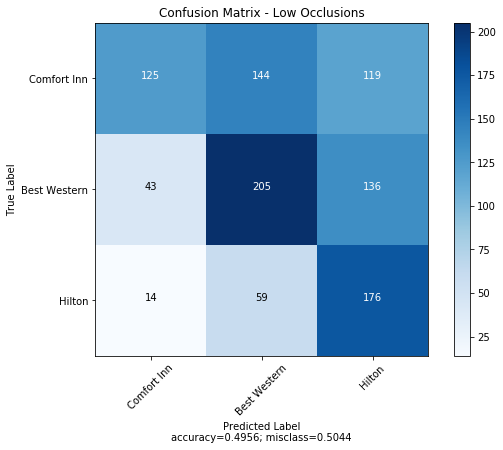

              precision    recall  f1-score   support

 Comfort Inn       0.69      0.32      0.44       388
Best Western       0.50      0.53      0.52       384
      Hilton       0.41      0.71      0.52       249

    accuracy                           0.50      1021
   macro avg       0.53      0.52      0.49      1021
weighted avg       0.55      0.50      0.49      1021



In [0]:
real_labels = list(test_labels)
predicted_labels = list(model.predict_classes(test_images_low_occlusions))
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = False,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Low Occlusions")

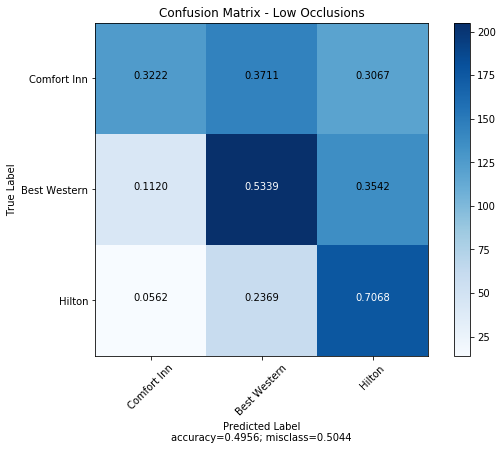

              precision    recall  f1-score   support

 Comfort Inn       0.69      0.32      0.44       388
Best Western       0.50      0.53      0.52       384
      Hilton       0.41      0.71      0.52       249

    accuracy                           0.50      1021
   macro avg       0.53      0.52      0.49      1021
weighted avg       0.55      0.50      0.49      1021



In [0]:
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = True,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Low Occlusions")

### Medium Occlusions

In [0]:
score = model.evaluate(test_images_medium_occlusions, test_labels_enc)
print("\nTest loss:      ", score[0])
print("Test accuracy:  ", score[1])

1021/1021 [==============================] - 3s 3ms/step

Test loss:       3.8552230507806744
Test accuracy:   0.43486777639762664


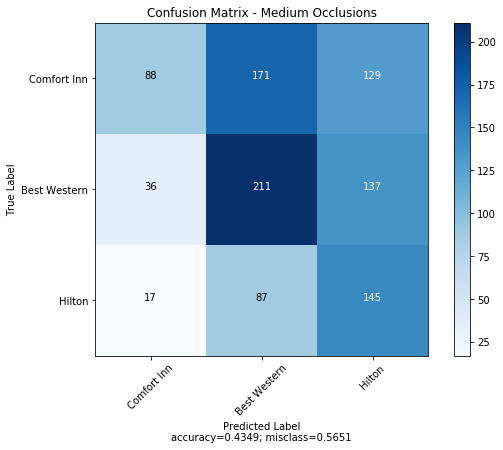

              precision    recall  f1-score   support

 Comfort Inn       0.62      0.23      0.33       388
Best Western       0.45      0.55      0.49       384
      Hilton       0.35      0.58      0.44       249

    accuracy                           0.43      1021
   macro avg       0.48      0.45      0.42      1021
weighted avg       0.49      0.43      0.42      1021



In [0]:
real_labels = list(test_labels)
predicted_labels = list(model.predict_classes(test_images_medium_occlusions))
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = False,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Medium Occlusions")

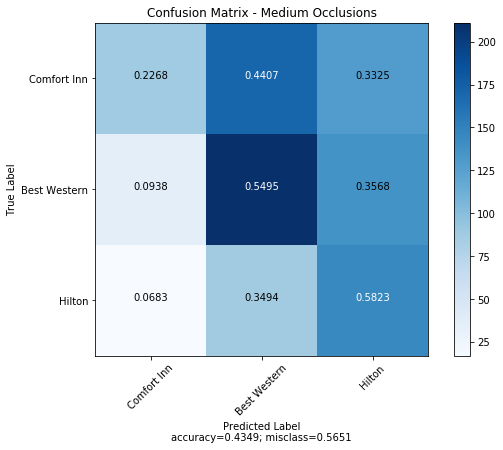

              precision    recall  f1-score   support

 Comfort Inn       0.62      0.23      0.33       388
Best Western       0.45      0.55      0.49       384
      Hilton       0.35      0.58      0.44       249

    accuracy                           0.43      1021
   macro avg       0.48      0.45      0.42      1021
weighted avg       0.49      0.43      0.42      1021



In [0]:
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = True,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - Medium Occlusions")

### High Occlusions

In [0]:
score = model.evaluate(test_images_high_occlusions, test_labels_enc)
print("\nTest loss:      ", score[0])
print("Test accuracy:  ", score[1])

1021/1021 [==============================] - 3s 3ms/step

Test loss:       4.3241017317795265
Test accuracy:   0.37904015653397266


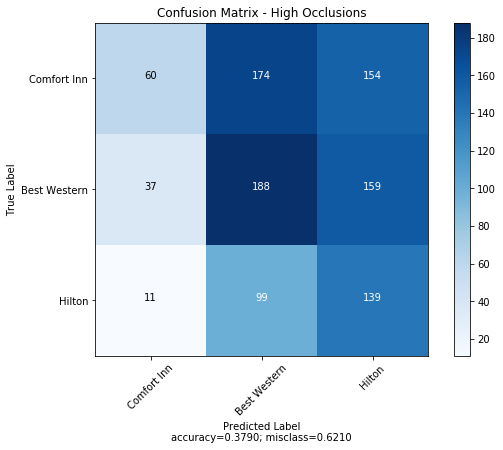

              precision    recall  f1-score   support

 Comfort Inn       0.56      0.15      0.24       388
Best Western       0.41      0.49      0.44       384
      Hilton       0.31      0.56      0.40       249

    accuracy                           0.38      1021
   macro avg       0.42      0.40      0.36      1021
weighted avg       0.44      0.38      0.36      1021



In [0]:
real_labels = list(test_labels)
predicted_labels = list(model.predict_classes(test_images_high_occlusions))
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = False,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - High Occlusions")

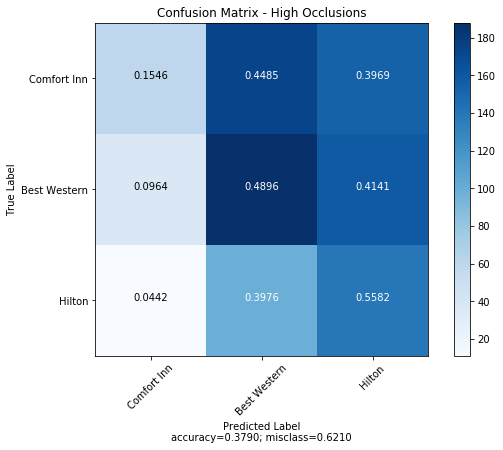

              precision    recall  f1-score   support

 Comfort Inn       0.56      0.15      0.24       388
Best Western       0.41      0.49      0.44       384
      Hilton       0.31      0.56      0.40       249

    accuracy                           0.38      1021
   macro avg       0.42      0.40      0.36      1021
weighted avg       0.44      0.38      0.36      1021



In [0]:
evaluate_model.plot_confusion_matrix(real_labels=real_labels,
                                     predicted_labels=predicted_labels,
                                     normalize    = True,
                                     target_names = ["Comfort Inn", "Best Western", "Hilton"],
                                     title        = "Confusion Matrix - High Occlusions")